Clase 3(a) - Calculo de índices espectrales
===========================================

### SoPI II: Herramientas de teledetección cuantitativa

En esta clase nos centraremos en el calculo de índices espectrales y la obtención de variables biofísicas a partir de los mismos.

Se utilizara este notebook de python para ayudar en el procesamiento.

Los notebooks se dividen de la siguiente manera

- **(a)** - Estimación de la linea de suelo para una imagen.
- (b) - Estimación de variables biofísicas.
- (c) - Grafica de la variación temporal de un índice.

### Carga de librerias

Recuerde que debe ejecutar **siempre** primero la celda que carga las librerias para ejecutar los procesos.

Durante esta clase utilizaremos las librerias

- [matplotlib](http://matplotlib.org/) para generación de gráficos.
- [numpy](http://www.numpy.org/) para el procesamiento numérico y matricial.
- [scipy](http://www.scipy.org) para realizar los ajustees lineales.
- [gdal](http://www.gdal.org) para la apertura de imágenes.

In [170]:
# Cargamos las librerais
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import gdal
import random

# Fijamos que muestre los graficos dentro de la linea
%matplotlib inline

Seleccionamos la imagen sobre la cual queremos calcular la linea de tendencia

In [3]:
# Nombre de la imagen
imagen_in = "../../material/imagenes/l8_oli_20130819.tif"

A continuación cargamos la imagen y sus propiedades (número de filas, columnas, etc).

Luego de esto leemos las bandas del rojo y el infrarrojo cercano como array de numpy y lo convertimos en un array lineal.

In [4]:
# cargo la imagen como un handle
imagen_ha = gdal.Open(imagen_in)

# Leo la cantidad de filas y columnas
Nx = imagen_ha.RasterXSize
Ny = imagen_ha.RasterYSize
N  = imagen_ha.RasterCount


# Leo las bandas 3 y 4 a dos arrays
red = imagen_ha.GetRasterBand(3).ReadAsArray()
nir = imagen_ha.GetRasterBand(4).ReadAsArray()

# Convierto los arrays a 1D
red.shape = Nx*Ny
nir.shape = Nx*Ny

Para encontrar la linea de suelo, buscamos ajustar los valores de brillo de la banda nir minimos para cada valor de la banda red.

Para esto debemos primero fijar los valores minimos y maximos de brillo para la banda red, ademas del tamaño de la ventana que usaremos para buscar el minimo.

In [165]:
lmin = 1000
lmax = 3500
step = 10

Construimos luego dos arrays x e y con los valores encontrados

In [166]:
# Creamos los arrays vacios
x = np.array([])
y = np.array([])
# Recorremos el rango de interes
for i in range(lmin,lmax,step):
    # Si tenemos valores en el rango
    if len(nir[(red>=i) & (red<i+step)]) > 0 :
        # Buscamos el minimo
        x2 = np.min(nir[(red>=i) & (red<i+step)])
        # Calculamos x para el minimo
        x1 = np.average(red[(nir==x2) & (red >= i) & (red <i+step)])
        # Guardamos el minimo
        x = np.append(x,x1)
        y = np.append(y,x2)

Usando `scipy` ajustamos los valores encontrados anteriormente

In [167]:
# Hacemos una regresion lineal
L = stats.linregress(x,y)
print(L)

LinregressResult(slope=1.182402638287336, intercept=-551.99017729859179, rvalue=0.87150414608913751, pvalue=2.1331996573955076e-69, stderr=0.045061707056201064)


Finalmente graficamos el scatter plot de ambas bandas junto con los valores encontrados.

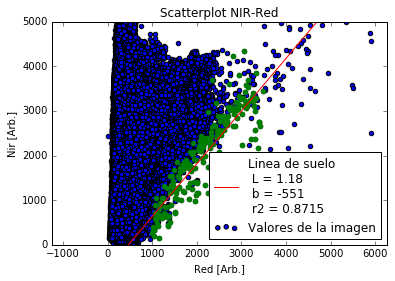

In [199]:
# Hago el scatterplot
plt.scatter(red,nir,label='Valores de la imagen')
# Graficamos los puntos usados para hacer el ajuste
plt.scatter(x,y,color="green")

# Graficamos la liena de suelo
t = np.linspace(0,5000,3)
l = L[0]*t+L[1]
plt.plot(t,l,color = "red", label='Linea de suelo\n L = '+str(int(1e2*L[0])/1e2)+'\n b = '+str(int(L[1]))+'\n r2 = '+str(str(int(1e5*L[2])/1e5)))
# Pongo el limite en x e y fijo la relacion de aspecto en 1
plt.axis('equal')
plt.axis([0, 5000, 0, 5000])
# Pongo nombres a los ejes
plt.xlabel("Red [Arb.]")
plt.ylabel("Nir [Arb.]")
# Pongo titulo
plt.title("Scatterplot NIR-Red")
# Configuracion de la leyenda
plt.legend(numpoints=1,loc=4)
# Muestro el scatterplot
plt.show()